In [1]:
!pip install tensorflow keras opencv-python tqdm numpy pandas matplotlib seaborn Pillow scikit-learn ipython opendatasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.2 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive/')
import zipfile
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/IMG.zip", 'r')
zip_ref.extractall("/content/dataset")
zip_ref.close()

Mounted at /content/drive/


In [1]:
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
# Now import TensorFlow
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
train_set = tf.keras.utils.image_dataset_from_directory(
    '/content/dataset/IMG',
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=123,
    validation_split=0.2,  # 80% for training
    subset="training",  # specify it's for training
    interpolation="bilinear",
    follow_links=False
)
# Validation set
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/dataset/IMG',
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=123,
    validation_split=0.2,  # 20% for validation
    subset="validation",  # specify it's for validation
    interpolation="bilinear",
    follow_links=False
)
def augment(image, label):
    image = tf.image.random_flip_left_right(image)  # Random horizontal flip
    image = tf.image.random_brightness(image, max_delta=0.2)  # Random brightness adjustment
    image = tf.image.random_contrast(image, lower=0.2, upper=1.8)  # Random contrast adjustment
    return image, label
print(train_set.class_names)
# Apply the augmentation function to the dataset
train_set = train_set.map(augment)

Found 20061 files belonging to 6 classes.
Using 16049 files for training.
Found 20061 files belonging to 6 classes.
Using 4012 files for validation.
['Basal Cell Carcinoma', 'Benign_Keratosis-like_Lesions', 'Melanocytic_Nevi', 'Melanoma', 'Seborrheic_Keratoses_and_other_Benign_Tumors', 'Tinea_Ringworm_Candidiasis_and_other_Fungal_Infections']


In [13]:
# Build CNN Model
cnn = tf.keras.models.Sequential()

# Input Layer
cnn.add(tf.keras.layers.InputLayer(input_shape=[128,128,3]))

# First Conv Block
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

# Second Conv Block
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

# Third Conv Block
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

# Fourth Conv Block
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

# Fifth Conv Block
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

# Dropout and Dense Layers
cnn.add(tf.keras.layers.Dropout(0.25))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))

# Output Layer
cnn.add(tf.keras.layers.Dense(units=6,activation='softmax'))  # Assuming 10 classes

# Compile Model
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
            loss='categorical_crossentropy',
            metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [14]:
training_history = cnn.fit(x=train_set,validation_data=validation_set,epochs=10)

Epoch 1/10
502/502 ━━━━━━━━━━━━━━━━━━━━ 118s 219ms/step - accuracy: 0.4711 - loss: 1.3460 - val_accuracy: 0.6436 - val_loss: 0.8615
Epoch 2/10
502/502 ━━━━━━━━━━━━━━━━━━━━ 106s 211ms/step - accuracy: 0.6496 - loss: 0.8718 - val_accuracy: 0.7183 - val_loss: 0.7366
Epoch 3/10
502/502 ━━━━━━━━━━━━━━━━━━━━ 105s 210ms/step - accuracy: 0.6922 - loss: 0.7731 - val_accuracy: 0.6757 - val_loss: 0.7547
Epoch 4/10
502/502 ━━━━━━━━━━━━━━━━━━━━ 139s 204ms/step - accuracy: 0.7167 - loss: 0.7084 - val_accuracy: 0.7460 - val_loss: 0.6250
Epoch 5/10
502/502 ━━━━━━━━━━━━━━━━━━━━ 145s 210ms/step - accuracy: 0.7447 - loss: 0.6516 - val_accuracy: 0.7732 - val_loss: 0.5876
Epoch 6/10
502/502 ━━━━━━━━━━━━━━━━━━━━ 103s 205ms/step - accuracy: 0.7638 - loss: 0.6108 - val_accuracy: 0.7597 - val_loss: 0.5903
Epoch 7/10
502/502 ━━━━━━━━━━━━━━━━━━━━ 148s 216ms/step - accuracy: 0.7721 - loss: 0.5944 - val_accuracy: 0.7764 - val_loss: 0.5742
Epoch 8/10
502/502 ━━━━━━━━━━━━━━━━━━━━ 106s 210ms/step - accuracy: 0.7851 -

In [15]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)
cnn.save('cleansed_disease_model.keras')

126/126 ━━━━━━━━━━━━━━━━━━━━ 18s 141ms/step - accuracy: 0.8141 - loss: 0.4994
Validation accuracy: 0.8115652799606323


In [16]:
training_history = cnn.fit(x=train_set,validation_data=validation_set,epochs=10)

Epoch 1/10
502/502 ━━━━━━━━━━━━━━━━━━━━ 107s 212ms/step - accuracy: 0.8197 - loss: 0.4669 - val_accuracy: 0.8043 - val_loss: 0.4908
Epoch 2/10
502/502 ━━━━━━━━━━━━━━━━━━━━ 143s 214ms/step - accuracy: 0.8251 - loss: 0.4446 - val_accuracy: 0.8218 - val_loss: 0.4565
Epoch 3/10
502/502 ━━━━━━━━━━━━━━━━━━━━ 140s 210ms/step - accuracy: 0.8359 - loss: 0.4222 - val_accuracy: 0.8118 - val_loss: 0.4719
Epoch 4/10
502/502 ━━━━━━━━━━━━━━━━━━━━ 106s 211ms/step - accuracy: 0.8476 - loss: 0.4021 - val_accuracy: 0.8078 - val_loss: 0.4840
Epoch 5/10
502/502 ━━━━━━━━━━━━━━━━━━━━ 108s 216ms/step - accuracy: 0.8533 - loss: 0.3810 - val_accuracy: 0.8300 - val_loss: 0.4460
Epoch 6/10
502/502 ━━━━━━━━━━━━━━━━━━━━ 136s 203ms/step - accuracy: 0.8609 - loss: 0.3602 - val_accuracy: 0.8163 - val_loss: 0.4564
Epoch 7/10
502/502 ━━━━━━━━━━━━━━━━━━━━ 144s 208ms/step - accuracy: 0.8787 - loss: 0.3213 - val_accuracy: 0.8350 - val_loss: 0.4313
Epoch 8/10
502/502 ━━━━━━━━━━━━━━━━━━━━ 104s 207ms/step - accuracy: 0.8947 -

In [17]:

#Training set Accuracy
train_loss, train_acc = cnn.evaluate(train_set)
print('Training accuracy:', train_acc)
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)
cnn.save('cleansed_20_epoch.keras')

502/502 ━━━━━━━━━━━━━━━━━━━━ 90s 179ms/step - accuracy: 0.9057 - loss: 0.2560
Training accuracy: 0.9127671718597412
126/126 ━━━━━━━━━━━━━━━━━━━━ 20s 155ms/step - accuracy: 0.8224 - loss: 0.4829
Validation accuracy: 0.8334994912147522


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


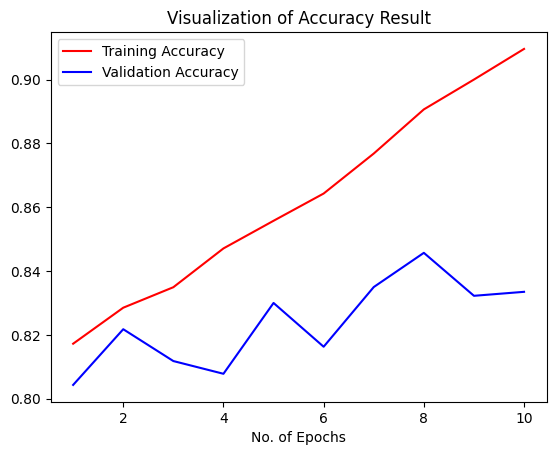

<Figure size 4000x4000 with 0 Axes>

<Figure size 4000x4000 with 0 Axes>

In [18]:
training_history.history #Return Dictionary of history
print(training_history.history.keys())
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()
plt.figure(figsize=(40, 40))

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━

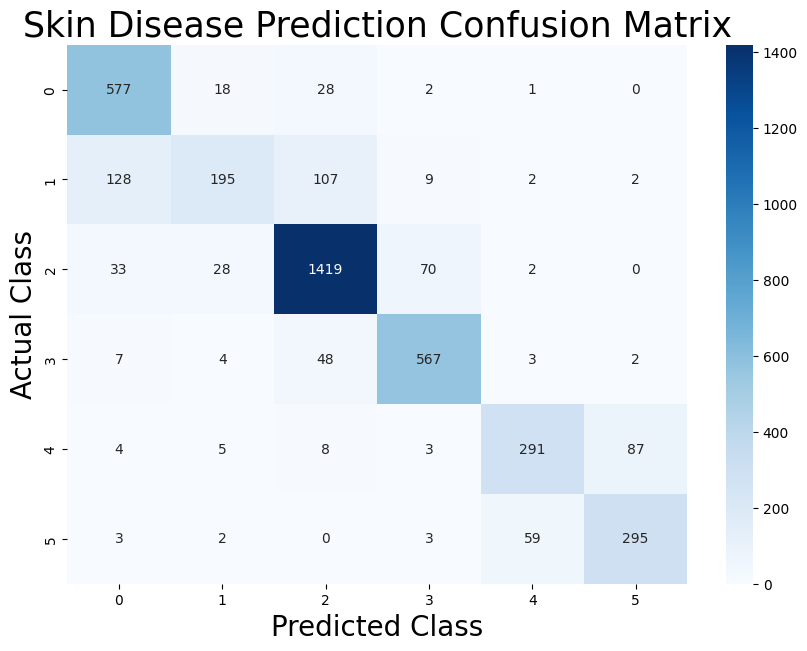

In [19]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Get true labels and predictions from the validation set
y_true = []
y_pred = []

# Loop over the validation dataset to collect actual and predicted labels
for images, labels in validation_set:
    predictions = cnn.predict(images)
    y_pred.extend(np.argmax(predictions, axis=1))  # Predicted classes
    y_true.extend(np.argmax(labels.numpy(), axis=1))  # True labels

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot heatmap for confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 10})
plt.xlabel('Predicted Class', fontsize=20)
plt.ylabel('Actual Class', fontsize=20)
plt.title('Skin Disease Prediction Confusion Matrix', fontsize=25)
plt.show()


In [20]:
# Import necessary libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score
import numpy as np

# Get true and predicted labels for validation set
y_true = []  # Ground truth labels
y_pred = []  # Predicted labels

# Iterate over the validation set and get predictions
for images, labels in validation_set:
    preds = cnn.predict(images)
    y_true.extend(np.argmax(labels.numpy(), axis=1))
    y_pred.extend(np.argmax(preds, axis=1))

# Calculate evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')
kappa = cohen_kappa_score(y_true, y_pred)

# Print evaluation metrics
print("Evaluation Metrics:")
print("--------------------")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"Cohen's Kappa Score: {kappa:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/s